# Graded Challenge 2
*Muhammad Ikhsan Rahman Hakim - FTDS001*

Objektif dari project ini adalah mendeteksi edge pixel pada suatu gambar dan melakukan transformasi linear pada gambar.

---------------

Import library yang dibutuhkan

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Data Loading
*Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.*

Import image yang akan digunakan.

In [58]:
img = Image.open("dog.jpg")

Dog image attributes:

In [61]:
imgformat=img.format
imgmode=img.mode
imgsize=img.size

print("Format: ",imgformat)
print("Mode: ",imgmode)
print("Size: ",imgsize)

Format:  JPEG
Mode:  RGB
Size:  (780, 438)


## Data Preprocessing
*Bagian ini berisi proses penyiapan data berupa preprocessing sebelum dilakukan processing lebih lanjut.*

Berikut adalah gambar yang akan diproses :

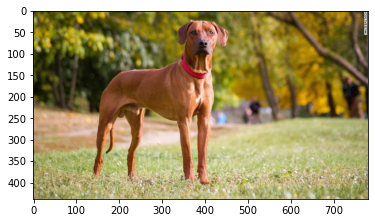

In [59]:
plt.imshow(img)

Split pixel gambar berdasarkan warna dasar (RGB), lalu buat array dari masing-masing warna.

In [84]:
red, green, blue = img.split()
red = np.array(red)
green = np.array(green)
blue = np.array(blue)

#Disini saya akan memilih warna dasar merah untuk digunakan sebagai acuan untuk menentukan edge dari gambar tersebut.
red

array([[ 86,  88,  87, ...,  48,  46,  59],
       [ 77,  77,  78, ...,  46,  64,  37],
       [ 64,  66,  68, ...,  56,  44,  70],
       ...,
       [165, 159, 151, ..., 150, 149, 145],
       [164, 157, 149, ..., 155, 153, 148],
       [164, 157, 146, ..., 160, 157, 150]], dtype=uint8)

In [8]:
print('Shape: ',np.array(red).shape)
print('Size: ',np.array(red).size)

Shape:  (438, 780)
Size:  341640


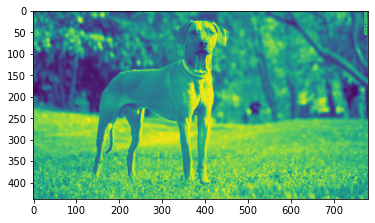

In [9]:
plt.imshow(red)

## Image Processing

Hitung vektor gradien (turunan parsial) masing-masing pixel untuk masing-masing sumbu x dan y.

In [11]:
dx,dy = np.gradient(red)

In [12]:
#Hitung gradient magnitude
mag=np.sqrt(dx**2+dy**2)

In [70]:
#Siapkan thresholds yang berbeda untuk beberapa nilai magnitude
mag5=np.where(mag>5,0,1)
mag30=np.where(mag>30,0,1)
mag60=np.where(mag>60,0,1)

Berikut adalah hasil dari perhitungan edge pada gambar. Jika nilai magnitude melebihi angka threshold, maka edge terdeteksi. Di sini saya menggunakan magnitude>30.

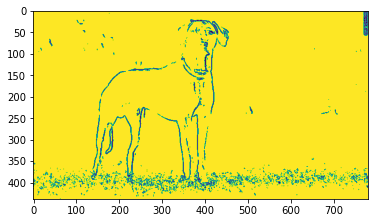

In [69]:
plt.imshow(mag30)

## Linear Transformation

In [74]:
#Mengambil gambar anjing hasil filter magnitude sebelumnya
dogedge = mag30
dogedge.shape

(438, 780)

In [82]:
#Buat sebuah matrix dengan size yang sama dengan gambar anjing
#Lalu isi diagonalnya dengan angka 1 (matrix identity)
m1= np.zeros((dogedge.shape[0],dogedge.shape[0]),int)
np.fill_diagonal(m1,1)

In [87]:
#flip matrix sebelumnya untuk membuat linear transformation matrix
m1_flip=np.flip(m1,axis=0)
m1_flip

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [90]:
#Flip gambar dengan mengkalikan menggunakan dot product antara
#linear transformation matrix dengan gambar anjing hasil filter magnitude sebelumnya
dogflip_img=m1_flip.dot(dogedge)

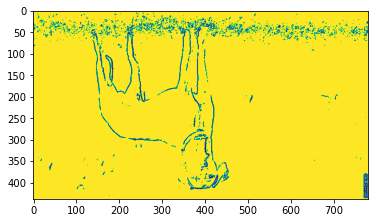

In [89]:
plt.imshow(dogflip_img)

## Hasil dan Kesimpulan

Proses ini kurang lebih untuk memisahkan "objek" atau piksel latar depan (foreground) dari pixel latar belakang (background) dalam membantu pemrosesan gambar, dengan cara mengatur batas level threshold.

Sebagai contoh, saya mencoba mengatur level threshold=5. Maka hampir seluruh edge gambar, baik foreground maupun background ikut terdeteksi.

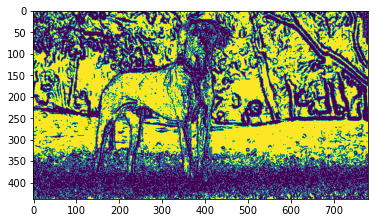

In [91]:
plt.imshow(mag5)

Lalu, untuk level thresold=30. Edge yang terdeteksi adalah gambar anjing yang menjadi foreground, yang mana adalah objektif dari project ini.

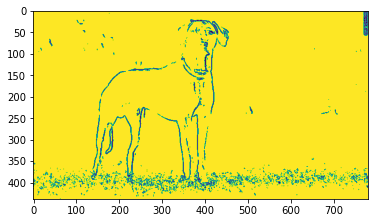

In [93]:
plt.imshow(mag30)

Dan terakhir, level thresold=60. Terlihat hampir seluruh edge tidak terdeteksi.

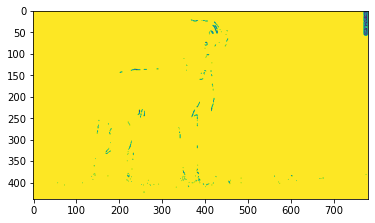

In [94]:
plt.imshow(mag60)

**Maka, untuk mengetahui foreground dan background dari sebuah gambar dalam sebuah pemrosesan gambar.
Kita dapat mengatur level threshold yang sesuai yakni sekitar 20-30 agar mendapatkan hasil yang diharapkan.**